# Monitor the model
questions:
- "How do I set the training goal?"
- "How do I monitor the training process?"
- "How do I detect (and avoid) overfitting?"
- "What are common options to improve the model performance?"
objectives:
- "Explain the importance of splitting the training data"
- "Use the data splits to plot the training process"
- "Set the training goal for your deep neural network"
- "Measure the performance of your deep neural network"
- "Interpret the training plots to recognize overfitting"
- "Implement basic strategies to prevent overfitting"


Weather prediction dataset:
![](https://carpentries-incubator.github.io/deep-learning-intro/fig/03_weather_prediction_dataset_map.png)

## 1. Formulate / outline the problem
We will output tomorrows sunshine hours in Basel, based on all measurements today.

In [1]:
import pandas as pd

In [2]:
filename = 'https://zenodo.org/record/5071376/files/weather_prediction_dataset_light.csv?download=1'
data = pd.read_csv(filename)
data.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
0,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,...,-15.2,-17.0,-13.4,0.97,1.0275,0.25,0.04,8.5,7.2,9.8
1,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,...,-13.7,-15.0,-12.3,0.99,1.0293,0.17,0.16,7.9,6.6,9.2
2,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,...,-9.2,-12.5,-5.8,0.91,1.0267,0.27,0.00,8.1,6.6,9.6
3,20000104,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,...,-5.6,-7.0,-4.2,0.95,1.0222,0.11,0.44,8.6,6.4,10.8
4,20000105,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,...,-7.6,-9.4,-5.8,0.95,1.0209,0.39,0.04,8.0,6.4,9.5


### Exercise:
* how many data points?
* how many features do we have? (don't count month and date)
* what are the different measured variables in each city?

In [3]:
data.shape

(3654, 91)

In [4]:
[col for col in data.columns if col.startswith('BASEL')]

['BASEL_cloud_cover',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max']

## 2. Identify inputs and outputs

In [5]:
# To save compute time, we only take the first three years
nr_rows = 3*365

# input: all features of today
X_data = data.loc[:nr_rows].drop(columns=['DATE', 'MONTH'])

# output: sunshine hours of tomorrow
y_data = data.loc[1:(nr_rows+1)]['BASEL_sunshine']

## 3. Prepare data
For this dataset, we don't need to deal with missing values.
But we're going to split in train and test

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_holdout, y_train, y_holdout = train_test_split(X_data, y_data,
                                                         test_size=0.3,
                                                         random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_holdout, y_holdout,
                                               test_size=0.5,
                                               random_state=0)

## 4. Choose a pre-trained model or build a new architecture from scratch
Think about these questions:
* What must be the dimension of our input layer?
* What type of output layer would you choose?

In [7]:
from tensorflow import keras

In [8]:
def create_nn():
    inputs = keras.Input(shape=X_data.shape[1], name='input')
    
    # Dense layers
    hidden_layer_1 = keras.layers.Dense(100, 'relu')(inputs)
    hidden_layer_2 = keras.layers.Dense(50, 'relu')(hidden_layer_1)
    
    # Output layer
    outputs = keras.layers.Dense(1)(hidden_layer_2)
    
    model = keras.Model(inputs=inputs,
                       outputs=outputs,
                       name='weather_prediction_model')
    return model

model = create_nn()

In [9]:
model.summary()

Model: "weather_prediction_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 89)]              0         
_________________________________________________________________
dense (Dense)                (None, 100)               9000      
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 14,101
Trainable params: 14,101
Non-trainable params: 0
_________________________________________________________________


## 5. Choose a loss function and optimizer

In [10]:
model.compile(optimizer='adam',
             loss='mse',
             metrics=[keras.metrics.RootMeanSquaredError()])

## 6. Train the model

In [11]:
history = model.fit(X_train, y_train,
                   batch_size=32,
                   epochs=200)

Epoch 1/200
24/24 [==============================] - 2s 4ms/step - loss: 15.1470 - root_mean_squared_error: 3.8919
Epoch 2/200
24/24 [==============================] - 0s 2ms/step - loss: 12.9533 - root_mean_squared_error: 3.5991
Epoch 3/200
24/24 [==============================] - 0s 2ms/step - loss: 11.5876 - root_mean_squared_error: 3.4041
Epoch 4/200
24/24 [==============================] - 0s 2ms/step - loss: 11.5006 - root_mean_squared_error: 3.3913
Epoch 5/200
24/24 [==============================] - 0s 2ms/step - loss: 10.7970 - root_mean_squared_error: 3.2859
Epoch 6/200
24/24 [==============================] - 0s 2ms/step - loss: 10.6578 - root_mean_squared_error: 3.2646
Epoch 7/200
24/24 [==============================] - 0s 3ms/step - loss: 10.6432 - root_mean_squared_error: 3.2624
Epoch 8/200
24/24 [==============================] - 0s 2ms/step - loss: 10.7849 - root_mean_squared_error: 3.2840
Epoch 9/200
24/24 [==============================] - 0s 2ms/step - loss: 9.9761 

Text(0, 0.5, 'RMSE')

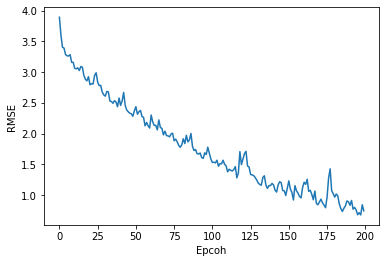

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

history_df = pd.DataFrame.from_dict(history.history)
sns.lineplot(data=history_df['root_mean_squared_error'])
plt.xlabel('Epcoh')
plt.ylabel('RMSE')

## 7. Perform a Prediction/Classification

In [13]:
y_train_predicted = model.predict(X_train)
y_test_predicted = model.predict(X_test)

In [14]:
y_test_predicted[:10]

array([[ 2.9625037 ],
       [-0.6170704 ],
       [-0.7255947 ],
       [ 7.0001817 ],
       [ 4.831606  ],
       [ 2.1131284 ],
       [ 2.566828  ],
       [ 6.187193  ],
       [-0.06580776],
       [ 1.7452002 ]], dtype=float32)

Text(0, 0.5, 'true sunshine hours')

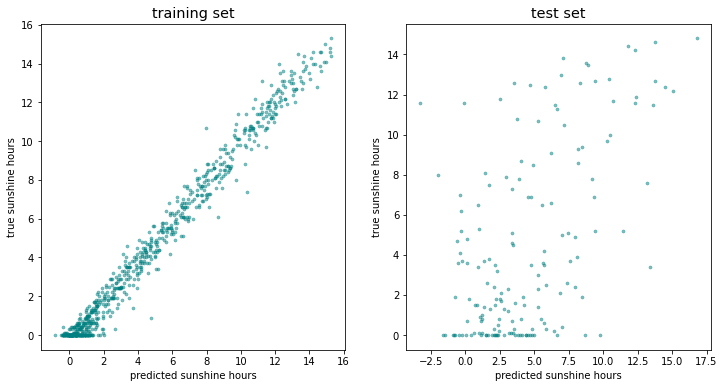

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
plt.style.use('ggplot')  # optional, that's only to define a visual style
axes[0].scatter(y_train_predicted, y_train, s=10, alpha=0.5, color="teal")
axes[0].set_title("training set")
axes[0].set_xlabel("predicted sunshine hours")
axes[0].set_ylabel("true sunshine hours")

axes[1].scatter(y_test_predicted, y_test, s=10, alpha=0.5, color="teal")
axes[1].set_title("test set")
axes[1].set_xlabel("predicted sunshine hours")
axes[1].set_ylabel("true sunshine hours")

In [16]:
train_metrics = model.evaluate(X_train, y_train, return_dict=True)
train_metrics

24/24 [==============================] - 1s 3ms/step - loss: 0.4222 - root_mean_squared_error: 0.6498


{'loss': 0.422248899936676, 'root_mean_squared_error': 0.649806797504425}

In [17]:
test_metrics = model.evaluate(X_test, y_test, return_dict=True)
test_metrics

6/6 [==============================] - 0s 3ms/step - loss: 16.6284 - root_mean_squared_error: 4.0778


{'loss': 16.628389358520508, 'root_mean_squared_error': 4.077792167663574}

Text(0, 0.5, 'true predicted sunshine')

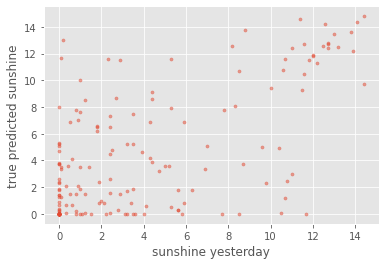

In [18]:
y_baseline_prediction = X_test['BASEL_sunshine']

plt.scatter(y_baseline_prediction, y_test, s=10, alpha=0.5)
plt.xlabel('sunshine yesterday')
plt.ylabel('true predicted sunshine')

In [19]:
from sklearn.metrics import mean_squared_error
rmse_baseline = mean_squared_error(y_test, y_baseline_prediction, squared=False)
print('Baseline:', rmse_baseline)
print('Neural network: ', test_metrics['root_mean_squared_error'])

Baseline: 3.877323350410224
Neural network:  4.077792167663574


## Go back to training process

In [20]:
model = create_nn()
model.compile(optimizer='adam',
             loss='mse',
             metrics=[keras.metrics.RootMeanSquaredError()])

In [21]:
history = model.fit(X_train, y_train,
                   batch_size=32,
                   epochs = 200,
                   validation_data=(X_val, y_val))

Epoch 1/200
24/24 [==============================] - 2s 42ms/step - loss: 22.1390 - root_mean_squared_error: 4.7052 - val_loss: 14.7631 - val_root_mean_squared_error: 3.8423
Epoch 2/200
24/24 [==============================] - 0s 7ms/step - loss: 14.0879 - root_mean_squared_error: 3.7534 - val_loss: 12.6665 - val_root_mean_squared_error: 3.5590
Epoch 3/200
24/24 [==============================] - 0s 8ms/step - loss: 13.0155 - root_mean_squared_error: 3.6077 - val_loss: 13.0623 - val_root_mean_squared_error: 3.6142
Epoch 4/200
24/24 [==============================] - 0s 8ms/step - loss: 13.2426 - root_mean_squared_error: 3.6390 - val_loss: 12.3734 - val_root_mean_squared_error: 3.5176
Epoch 5/200
24/24 [==============================] - 0s 7ms/step - loss: 12.4825 - root_mean_squared_error: 3.5331 - val_loss: 12.0504 - val_root_mean_squared_error: 3.4714
Epoch 6/200
24/24 [==============================] - 0s 8ms/step - loss: 11.9443 - root_mean_squared_error: 3.4561 - val_loss: 12.1932

In [22]:
history_df = pd.DataFrame.from_dict(history.history)
history_df.head()

,loss,root_mean_squared_error,val_loss,val_root_mean_squared_error
0,22.138988,4.705209,14.763096,3.842278
1,14.087879,3.753382,12.666486,3.559001
2,13.015467,3.607696,13.062306,3.614181
3,13.242598,3.639038,12.373441,3.517590
4,12.482451,3.533051,12.050380,3.471366


Text(0, 0.5, 'RMSE')

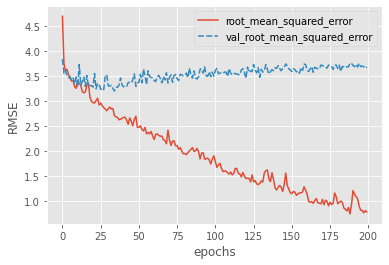

In [23]:
sns.lineplot(data=history_df[['root_mean_squared_error', 'val_root_mean_squared_error']])
plt.xlabel('epochs')
plt.ylabel('RMSE')

## 9. Tune Hyperparameters
Exercise: try reducing the number of hidden nodes. Does this improve the perfomance?

## Early stopping

In [24]:
model = create_nn()
model.compile(optimizer='adam',
             loss='mse',
             metrics = [keras.metrics.RootMeanSquaredError()])

In [25]:
from tensorflow.keras.callbacks import EarlyStopping

earlystopper = EarlyStopping(monitor='val_loss',
                            patience=10,
                            verbose=1)

history = model.fit(X_train, y_train,
                   batch_size=32,
                   epochs=200,
                   validation_data=(X_val, y_val),
                   callbacks=[earlystopper])

Epoch 1/200
24/24 [==============================] - 3s 36ms/step - loss: 16.9283 - root_mean_squared_error: 4.1144 - val_loss: 11.9198 - val_root_mean_squared_error: 3.4525
Epoch 2/200
24/24 [==============================] - 0s 9ms/step - loss: 12.5704 - root_mean_squared_error: 3.5455 - val_loss: 12.5009 - val_root_mean_squared_error: 3.5357
Epoch 3/200
24/24 [==============================] - 0s 7ms/step - loss: 12.0605 - root_mean_squared_error: 3.4728 - val_loss: 11.9455 - val_root_mean_squared_error: 3.4562
Epoch 4/200
24/24 [==============================] - 0s 7ms/step - loss: 11.1728 - root_mean_squared_error: 3.3426 - val_loss: 11.9326 - val_root_mean_squared_error: 3.4544
Epoch 5/200
24/24 [==============================] - 0s 7ms/step - loss: 11.4993 - root_mean_squared_error: 3.3911 - val_loss: 12.4094 - val_root_mean_squared_error: 3.5227
Epoch 6/200
24/24 [==============================] - 0s 7ms/step - loss: 10.7214 - root_mean_squared_error: 3.2743 - val_loss: 11.9102

<AxesSubplot:>

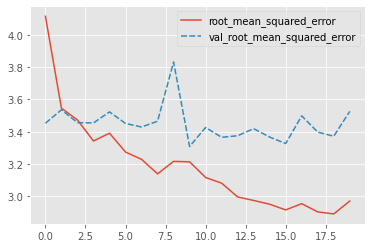

In [26]:
history_df = pd.DataFrame.from_dict(history.history)
sns.lineplot(data=history_df[['root_mean_squared_error', 'val_root_mean_squared_error']])

In [27]:
EarlyStopping?

Init signature:
EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=0,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
)
Docstring:     
Stop training when a monitored metric has stopped improving.

Assuming the goal of a training is to minimize the loss. With this, the
metric to be monitored would be `'loss'`, and mode would be `'min'`. A
`model.fit()` training loop will check at end of every epoch whether
the loss is no longer decreasing, considering the `min_delta` and
`patience` if applicable. Once it's found no longer decreasing,
`model.stop_training` is marked True and the training terminates.

The quantity to be monitored needs to be available in `logs` dict.
To make it so, pass the loss or metrics at `model.compile()`.

Args:
  monitor: Quantity to be monitored.
  min_delta: Minimum change in the monitored quantity
      to qualify as an improvement, i.e. an absolute
      change of less than min_delta, will count as no
      

## Batch normalization

In [28]:
def create_nn_batchnorm():
    inputs = keras.Input(shape=X_data.shape[1], name='input')
    
    # Batch norm
    batchnorm_layer = keras.layers.BatchNormalization()(inputs)
    
    # Dense layers
    hidden_layer_1 = keras.layers.Dense(100, 'relu')(batchnorm_layer)
    hidden_layer_2 = keras.layers.Dense(50, 'relu')(hidden_layer_1)
    
    # Output layer
    outputs = keras.layers.Dense(1)(hidden_layer_2)
    
    model = keras.Model(inputs=inputs,
                       outputs=outputs,
                       name='weather_prediction_model')
    return model

model = create_nn_batchnorm()

In [29]:
model.summary()

Model: "weather_prediction_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 89)]              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 89)                356       
_________________________________________________________________
dense_9 (Dense)              (None, 100)               9000      
_________________________________________________________________
dense_10 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 51        
Total params: 14,457
Trainable params: 14,279
Non-trainable params: 178
_________________________________________________________________


In [30]:
model.compile(loss='mse', optimizer='adam',
             metrics= [keras.metrics.RootMeanSquaredError()])
history = model.fit(X_train, y_train, batch_size=32,
         epochs=200,
         validation_data = (X_val, y_val),
         callbacks=[earlystopper])

Epoch 1/200
24/24 [==============================] - 3s 38ms/step - loss: 21.3990 - root_mean_squared_error: 4.6259 - val_loss: 146.8415 - val_root_mean_squared_error: 12.1178
Epoch 2/200
24/24 [==============================] - 0s 9ms/step - loss: 13.1177 - root_mean_squared_error: 3.6218 - val_loss: 44.0837 - val_root_mean_squared_error: 6.6396
Epoch 3/200
24/24 [==============================] - 0s 8ms/step - loss: 11.3218 - root_mean_squared_error: 3.3648 - val_loss: 32.4104 - val_root_mean_squared_error: 5.6930
Epoch 4/200
24/24 [==============================] - 0s 8ms/step - loss: 10.7353 - root_mean_squared_error: 3.2765 - val_loss: 23.1029 - val_root_mean_squared_error: 4.8065
Epoch 5/200
24/24 [==============================] - 0s 8ms/step - loss: 10.4979 - root_mean_squared_error: 3.2400 - val_loss: 16.4555 - val_root_mean_squared_error: 4.0565
Epoch 6/200
24/24 [==============================] - 0s 8ms/step - loss: 9.8859 - root_mean_squared_error: 3.1442 - val_loss: 14.193

<AxesSubplot:>

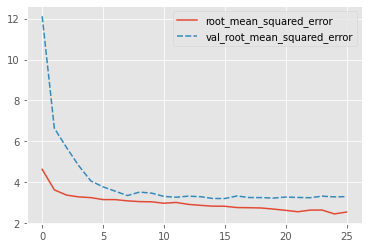

In [31]:
history_df = pd.DataFrame.from_dict(history.history)
sns.lineplot(data=history_df[['root_mean_squared_error', 'val_root_mean_squared_error']])

### Exercise 4: Simplify the model and add data

You may have been wondering why we are including weather observations from
multiple cities to predict sunshine hours only in Basel. The weather is
a complex phenomenon with correlations over large distances and time scales,
but what happens if we limit ourselves to only one city?

1. Since we will be reducing the number of features quite significantly,
we should afford to include more data. Instead of using only 3 years, use
8 or 9 years!
2. Remove all cities from the training data that are not for Basel.
You can use something like:
~~~
cols = [c for c in X_data.columns if c[:5] == 'BASEL']
X_data = X_data[cols]
~~~
3. Now rerun the last model we defined which included the BatchNorm layer.
Recreate the scatter plot comparing your prediction with the baseline
prediction based on yesterday's sunshine hours, and compute also the RMSE.
Note that even though we will use many more observations than previously,
the network should still train quickly because we reduce the number of
features (columns).
Is the prediction better compared to what we had before?
4. (Optional) Try to train a model on all years that are available, and all features from all cities. How does it perform?

## Tensorboard

In [32]:
from tensorflow.keras.callbacks import TensorBoard
import datetime

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

model.compile(loss='mse', optimizer='adam',
             metrics= [keras.metrics.RootMeanSquaredError()])

history = model.fit(X_train, y_train, batch_size=32,
         epochs=200,
         validation_data = (X_val, y_val),
         callbacks=[earlystopper, tensorboard_callback])

Epoch 1/200
24/24 [==============================] - 4s 79ms/step - loss: 6.5234 - root_mean_squared_error: 2.5541 - val_loss: 11.5369 - val_root_mean_squared_error: 3.3966
Epoch 2/200
24/24 [==============================] - 0s 8ms/step - loss: 5.9542 - root_mean_squared_error: 2.4401 - val_loss: 10.6947 - val_root_mean_squared_error: 3.2703
Epoch 3/200
24/24 [==============================] - 0s 8ms/step - loss: 5.2415 - root_mean_squared_error: 2.2894 - val_loss: 10.7799 - val_root_mean_squared_error: 3.2833
Epoch 4/200
24/24 [==============================] - 0s 8ms/step - loss: 5.3926 - root_mean_squared_error: 2.3222 - val_loss: 11.3004 - val_root_mean_squared_error: 3.3616
Epoch 5/200
24/24 [==============================] - 0s 8ms/step - loss: 5.3587 - root_mean_squared_error: 2.3149 - val_loss: 11.2369 - val_root_mean_squared_error: 3.3521
Epoch 6/200
24/24 [==============================] - 0s 8ms/step - loss: 5.6458 - root_mean_squared_error: 2.3761 - val_loss: 10.9218 - val

In [34]:
%load_ext tensorboard
%tensorboard --logdir logs/fit

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 15480), started 2 days, 0:13:55 ago. (Use '!kill 15480' to kill it.)